In [165]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random
import matplotlib.pyplot as plt

Jason Sheu

Ronaldo Romano

America, with its deep unfortunate history of slavery, discrimination, and racism, has evolved to the point where racial discrimination can be found at all levels of life and governement. A common point brought up when talking about America’s problems with systemic racism is the discrimination found within the policing system. It is often perceived that black and hispanic Americans are treated unfairly by police in most situations, due to different racial stereotypes. With traffic stops being the primary way that Americans interact with police, traffic stop data proves to be incredibly useful in what insights it can provide us. The assumption in all traffic stops is that it is up to an officer to determine if the stopped individual is suspicious enough to engage in one of few post stop outcomes: a search, citation, or arrest. However, suspicion can be subjective, and without proof, which is where the implicit bias that some officers have comes into play. In this paper we will be exploring the different ways to identify racial bias in policing, and how different factors, both racial and social, have different effects on post stop outcomes, with a deep dive into police traffic stop data from Charlotte, North Carolina. 

To understand the roots of racial inequality in America, we have to understand the roots of American policing, and how those roots stem from the slave trade, slave catchers, and the slave code. Police departments were first founded in many cities across America to mimic the departments found in England at the time. However, the police in slave states were based in the slave catching industry (Hassett-Walker). The first slave patrols came to be in the early 18th century, to catch and return any escaped slaves, to quell slave riots, and to punish slaves for misbehavior. By the end of the 18th century, they had evolved into government funded groups with no oversight and almost complete freedom to act against any slaves. With the south’s defeat in the Civil War, slave patrols became the south’s police departments, meant to uphold the new Black Codes to had be enacted (Hassett-Walker). The Black Codes were laws passed after the abolition of slavery in 1865 that limited what freed slaves could do in terms of work and pay, essentially keeping them enslaved, and these Codes eventually turned into the Jim Crow laws, which continued to discriminate against freed slaves and their descendants. The police would continue in their role of enforcing these racist laws, even through the civil rights act of 1964, which banned any discrimination based on race, gender or ethnicity. The racist roots of our modern policing systems have never been addressed, and with biases being taught and passed down from each generation of police to the next, we can see how this problem of systemic racism in policing is still so prevalent and hard to eradicate. In recent years, more and more attention is being brought towards discrimiation in policing decisions and outcomes with regard to a subject’s race. Recent polls conducted by Gallup indicate that Black adults in America feel they are being mistreated when in an encounter with the police. 59% of Black people feel that they had a positive experience with the police, and the remaining 41% did not have a positive experience. Comparatively, 75% of White adults say that they have a positive experience, with 25% not having a positive experience (Gallup). This large difference points to a trend that Black people  are indeed treated differently by police, whether it be through a traffic stop or other means of interaction. To further explore this perceived irregularity, we will be investigating traffic stop data from Charlotte, North Carolina, a state that has deep roots in slavery and racism. Using data sourced by the Stanford Open Policing project, we will look at different post stop outcomes when compared to race, and see how there may be differences between the ways that Black drivers are stopped when compared to White drivers.

The data we got from the Stanford Open Policing has quite a few columns that would be helpful in our investigation of our proposed problem. Some of these include citation issued, warning issued, arrest made, the specific reasons, what the outcome was, the ethnicity (Hispanic/not Hispanic),  and the race of the driver. From week 2, lecture 4 we go over race as a variable in data and how it is mainly political and how the census uses this collected data for money distribution (Aaron’s slides/book). Although the race column in this dataset does not cover a lot of different races, we do have the race for Black drivers and White drivers which is what we are mainly going to be using to get our results. If we were to not have the columns of driver race, contraband found, outcome, or if a search was conducted, then that would greatly impact our ability to do any sort of analysis on figuring out whether there is some sort of bias happening. For example, if we did not have the contraband found column in our dataset and we were trying to build a prediction model that predicts whether or not someone should be searched, we would be unable to teach it to be unbiased. Let's say that the model predicted to search the driver, but in real life they did not search, we would want to flip this predicted label to a 0, as in no search, but our data does not have this information, therefore we can not switch it. If the driver was searched, but we do not have the contraband found variable then we would not be able to say if this search was justifiable or not. If we did not have the race column, then that is obvious, we would not be able to do any sort of analysis, at that point it would be just stops recorded. In terms of power within the police force, specifically in Charlotte, NC, 68% of police officers are White officers (CMPD Dataset). As we see in the dataset, the stops are mostly comprised of Black drivers. This deals with the interpersonal domain within the matrix of domination and how Black drivers do not feel safe around White officers because of past incidents around the country. These ideas can be connected to hegemonic domain which is what we see in the media. Always seeing stories of Black people getting mistreated by White officers and this conveys a message to the country.

In [105]:
import pandas as pd

In [106]:
stops = pd.read_csv('nc_charlotte_2020_04_01.csv')

In [107]:
stops = stops.drop(['raw_row_number', 'raw_action_description', 'raw_Ethnicity', 'raw_Race', 'department_name', 'location', 'county_name'],axis=1)

In [108]:
stops = stops[stops['subject_race'] != 'unknown']
stops = stops[stops['subject_race'] != 'other']

In [109]:
def get_year(x):
    return int(x[:4])

In [110]:
stops['year'] = stops['date'].apply(get_year)

In [111]:
def get_yearly_count(df):
    all_years = list(df['year'].unique())
    for i in all_years:
        print(str(i)+': '+str(sum(df['year']==i)))

In [112]:
stops = stops[stops['year']==2014]

In [113]:
stops = stops.drop(['reason_for_frisk', 'reason_for_search'], axis=1)

In [114]:
def replace_na(x, col_name):
    if x['search_conducted'] == True:
        return x[col_name]
    else:
        return False

In [115]:
stops['improved_contra_found'] = stops.apply(lambda x: replace_na(x, 'contraband_found'), axis=1)
stops['improved_contra_drugs'] = stops.apply(lambda x: replace_na(x, 'contraband_drugs'), axis=1)
stops['improved_contra_weapons'] = stops.apply(lambda x: replace_na(x, 'contraband_weapons'), axis=1)
stops['improved_search_basis'] = stops.apply(lambda x: replace_na(x, 'search_basis'), axis=1)

In [116]:
stops = stops.drop(['contraband_found', 'contraband_drugs', 'contraband_weapons', 'search_basis'], axis=1)

In [117]:
stops = stops.dropna()

We will be using demographic data to measure demographic parity. By using public data that describes Charlotte’s demographic profile. According to the US Census, Charlotte’s racial breakdown is: 46.7% white, 35.5% black, 6.6% asian, and 14.6% hispanic for the major racial groups. These are also the racial groups we see represented in our traffic stop data. To analyze our data, we will be comparing the overall racial breakdown of our stop data to the racial breakdown of Charlotte. We expect our data to be similar to the breakdown of the city, and if it is not, that is a sign that there might be more going on when police are pulling drivers over, and that the process is not fair. After cleaning out data, we calculated the racial breakdown of our stops data. We found that our data was 35.6% white, 53.0% black, 1.7% asian, and 10% hispanic. We can see that overall, white people and black make up a slightly larger proportion of the dataset combined, making up 88.6% of the stops data, when they only comprise 82.2% of the city’s population. We can also see a pretty large difference between the stop rates of white people and Black people. White people made up 35.6% of our dataset, when they actually take up 46.7% of the population. Black people , however, make up 53% of our dataset, when they only take up 35.5% of the population. We also calculated the demographic breakdown of the people that were searched after a stop, to find that Black drivers were the group that was most searched, at 71% of all searches, compared to white drivers making up 20%. This is a huge difference from Charlotte’s overall demographic breakdown. Through our demographic parity measure, there is unfairness in the way that police officers pull over drivers. To confirm this, we performed a t-test on the arrest and search rates between white people and Black people, on a sample size of 10,000, with a null hypothesis that the arrest and search rates should be the same across groups. For arrests, we got a p-value of 0.14, and for searches, we got a p-value of 2.6x10^-26. With these p-values, we accept the null hypothesis for arrests, but reject the null hypothesis for searches.

In [118]:
pop_v_stopped = pd.DataFrame()
actual_pop = [6.52, 35.22, 'not provided', 48.83]
races = ['asian/pacific islander', 'black', 'hispanic', 'white']
pop_v_stopped['subject_race'] = races
pop_v_stopped = pop_v_stopped.set_index('subject_race')
pop_v_stopped['charlotte population'] = actual_pop
pop_v_stopped['charlotte stopped'] = (stops.groupby('subject_race').count()['date']/len(stops))*100
pop_v_stopped['charlotte searched'] = (stops[stops['search_conducted']].groupby('subject_race').count()['date']/len(stops[stops['search_conducted']]))*100
pop_v_stopped

,charlotte population,charlotte stopped,charlotte searched
subject_race,,,
asian/pacific islander,6.52,1.728035,0.758150
black,35.22,52.958258,70.943897
hispanic,not provided,9.756673,7.903715
white,48.83,35.557034,20.394238


In [119]:
def day_night(x):
    if x['time'] > '20:15:00' and x['time'] < '23:59:59':
        return 'night'
    elif x['time'] < '06:45:00' and x['time'] > '00:00:00':
        return 'night'
    else:
        return 'day'

In [120]:
stops['day_night'] = stops.apply(lambda x: day_night(x), axis=1)

In [121]:
day_stops = stops[stops['day_night']=='day']
night_stops = stops[stops['day_night']=='night']

In [122]:
day_overall = day_stops.groupby('subject_race').count().sort_values('subject_race')
day_search = day_stops[day_stops['search_conducted']].groupby('subject_race').count().sort_values('subject_race')

In [123]:
# (day_search['date']/day_overall['date'])*100

In [124]:
night_overall = night_stops.groupby('subject_race').count().sort_values('subject_race')
night_search = night_stops[night_stops['search_conducted']].groupby('subject_race').count().sort_values('subject_race')

In [125]:
# (night_search['date']/night_overall['date'])*100

In [126]:
# len(day_stops), len(night_stops)

Another thing we wanted to add for our demographic parity was day search rates versus night search rates, so if 15% of stopped White drivers were searched during the day, we would expect a similar rate during the night. We ended up seeing that every race is more likely to get searched during the night than they are during the day. 

In [127]:
day_v_night = pd.DataFrame()
day_v_night['day search rate'] = (day_search['date']/day_overall['date'])*100
day_v_night['night search rate'] = (night_search['date']/night_overall['date'])*100
day_v_night

,day search rate,night search rate
subject_race,,
asian/pacific islander,0.797101,2.799228
black,3.490289,7.304628
hispanic,1.659263,4.843828
white,1.065586,4.396878


We wanted to also search rate for each race at every hour of the day. The results we got show that the majority of stops performed at each hour are comprised of Black drivers, followed by White drivers, Hispanic drivers, and Asian/Pacific Islander drivers. There is a big gap between search rates of Black drivers and White drivers.

Text(0.5, 1.0, 'Search Rate per Hour, grouped by Race')

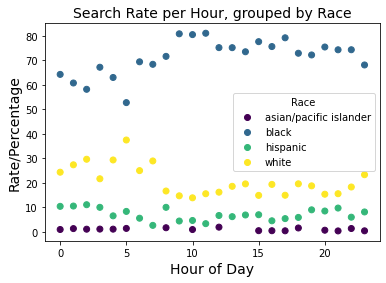

In [128]:
import matplotlib.pyplot as plt

scatter = plt.scatter(hour_race.hour_day, hour_race.rate, c=hour_race.subject_race.astype('category').cat.codes)
plt.xlabel("Hour of Day",
            size=14)
plt.ylabel("Rate/Percentage", 
            size=14)
plt.legend(handles=scatter.legend_elements()[0], 
           labels=list(hour_race['subject_race'].unique()),
           title="Race")
plt.title("Search Rate per Hour, grouped by Race",
            size=14)

From these results, we can conclude that there is indeed inequality in police search and stop rates, particularly between white and Black drivers, but analysis showed that there was no inequality in arrest rates. For stop rates, we can see that black drivers have a much higher stop rate when compared to their demographic breakdown. However, this approach is not without limitations. The higher stop rate of black drivers could possibly be attributed to where they were stopped. For example, if a police officer primarily patrols a neighborhood that has a higher population of black people, they will be stopping black people more often on average due to the larger number of them coming and leaving the area. One way to improve on this parity metric is by using census data. By using census data and police district lines, we can get more granular information about the racial breakdown of the police district someone was stopped in, and do that comparison of stop rates by district compared to racial breakdown. However, this does not discount the presence of a disparity between the demographic breakdown of Charlotte and the actual observed stop racial breakdown of white and Black drivers. The reasoning as to why we decided to do the demographic parity between stop rates during the day and during the night was because of the Veil of Darkness. The Veil of Darkness is basically splitting the data up into two parts, stops conducting during the day when the sun is out and can clearly see the drivers’ race and during the night when it is much harder for officers to see the drivers’ race, thus not being able to bias towards a specific group, if there is any. This drastic shift in breakdowns is likely attributed to the racist history of this state, and how implicit biases have been passed down through generations of police and cultural training, leading officers to believe that Black people are more likely to commit crimes. For search rates, we see an alarmingly large difference in demographic breakdown, as well as a low p-value as a result of our t-test, leading us to believe that inequality is occurring in searches. This makes sense, as once a car is stopped, an officer can clearly see the race of the driver after obtaining their license and registration, and if that officer is biased towards thinking that Black people are likely to be in possession of contraband, they will be more likely to do a search based on their “reasonable suspicion.” This parity measure is again limited by the broad scale of our analysis, and can be improved upon by using census data and police districts, but the disparity is large enough to warrant beyond a reasonable doubt that there is indeed inequality in police searches. Finally, we can look at the arrest rates and the t-test we conducted on the data with arrests in mind. There isn’t a clear showing of inequality in arrests, which actually further supports our conclusion that there is inequality in searches. If contraband was actually found in a search, the driver would likely be arrested, or at the very least, cited. But since arrest rates are fairly equal across racial groups, this suggests that even with the higher number of Black drivers being searched, Black people are not arrested more, since they do not actually carry contraband more often. Furthermore, arrests are much more complicated to carry out compared to a search. Officers need to write an arrest report, and bring in the driver for booking, making it very hard for them to falsely arrest and hold a driver for a fake crime. Even if an officer is biased, they are not likely to break the law just to arrest more Black people. Our analysis, while having a likely overrepresentation of potential biases, still paints alarming results regarding inequality in police stop, search, and arrest rates.

In conclusion, we see that there is indeed some bias going on during traffic stops in Charlotte, North Carolina. Through demographic parity, there is some evidence to show that Black drivers are getting stopped more than they should be. The rate at which they are getting stopped and searched is higher than the percentage of Black people living in Charlotte. 

**Sources**

https://worldpopulationreview.com/us-cities/charlotte-nc-population 

https://news.gallup.com/poll/316247/black-americans-police-encounters-not-positive.aspx

https://www.americanbar.org/groups/crsj/publications/human_rights_magazine_home/civil-rights-reimagining-policing/how-you-start-is-how-you-finish/

https://5harad.com/papers/100M-stops.pdf

https://data.charlottenc.gov/datasets/cmpd-employee-demographics/explore


In [129]:
f = dict()
hour = 0
for i in range(24):
    if i < 10:
        curr = '0'+str(i)
    else:
        curr = str(i)
    f[curr] = hour
    hour+=1

In [130]:
def get_hour(x):
    return f[x['time'][:2]]

In [131]:
stops['hour_day'] = stops.apply(lambda x: get_hour(x), axis=1)

In [132]:
per_hour = (stops[stops['search_conducted']].groupby('hour_day').count()['date']).to_dict()

In [133]:
hour_race = stops[stops['search_conducted']].groupby(['subject_race','hour_day']).count()[['date']].reset_index()

In [134]:
def get_hr_rate(x):
    return (x['date']/per_hour[x['hour_day']])*100

In [135]:
hour_race['rate'] = hour_race.apply(lambda x: get_hr_rate(x), axis=1)

In [136]:
hour_race = hour_race.drop(['date'],axis=1)

# PAPER 2 STUFF

In [149]:
stops = stops.loc[(stops['subject_race']=='white')|(stops['subject_race']=='black')]

In [150]:
def prepare_data(input_df):
    """Prepare the Stanford Open Policing Data to be used in the classification model
    Parameters
    ----------
    csv_link : str
        The link of the data you want to do analysis on.
    race_included : int
        If you want the model to include race or not, 1 
        indicating race should be included, else race will not be included."""
    
    def convert_search(x):
        if x:
            return 1
        else:
            return 0
        
    def get_month(x):
        return int(x[5:7])
    
    def get_year(x):
        return int(x[:4])
    
    def time_gaps(x):
        if x >= '05:00:00' and x < '12:00:00':
            return 'Morning'
        elif x >= '12:00:00' and x < '17:00:00':
            return 'Afternoon'
        elif x >= '17:00:00' and x < '21:00:00':
            return 'Evening'
        elif x >= '21:00:00' and x < '05:00:00':
            return 'Night'
        
    def change_contraband(row):
        if row['is_searched'] == 1:
            return row['improved_contra_found']
        else:
            return False
        
    def failed_search(row):
        if row['is_searched'] == 1 and row['improved_contra_found'] == False:
            return 1
        else:
            return 0
        
    def improved_target(row):
        if row['is_searched'] == 1 and row['failed_search'] == 1:
            return 0
        elif row['is_searched'] == 0:
            return 0
        else:
            return 1
        
    def change_month(row):
        curr_month = row['month']
        curr_year = row['year']
        return 12*(year_lst.index(curr_year)+1)-(12-curr_month)    
    
    stanford_df = input_df
    stanford_df = stanford_df[stanford_df['date'].notna()]
    stanford_df = stanford_df[stanford_df['time'].notna()]


    use_columns = ['date', 'time', 'subject_age', 'reason_for_stop', 'subject_race', 'subject_sex',
                           'type', 'search_conducted', 'improved_contra_found']

    # keep all columns that will help in prediction model
    stanford_df = stanford_df[use_columns]
    
    stanford_df = stanford_df[stanford_df['subject_race'].notna()]
    race_options = ['white', 'black']
    stanford_df = stanford_df[stanford_df['subject_race'].isin(race_options)]
    
    # get the month in a column
    stanford_df['month'] = stanford_df['date'].apply(get_month)
    
    # get the year in a column
    stanford_df['year'] = stanford_df['date'].apply(get_year)
    
    # get day of week name in column
    stanford_df['date'] = pd.to_datetime(stanford_df['date'])
    stanford_df['day of week'] = stanford_df['date'].dt.day_name()
    
    # change the month number for all the years
    year_lst = list(np.sort(stanford_df['year'].unique()))
    stanford_df['month'] = stanford_df.apply(change_month, axis=1)
    
    stanford_df['time of day'] = stanford_df['time'].apply(time_gaps)
    stanford_df['is_searched'] = stanford_df['search_conducted'].apply(convert_search)
    stanford_df['contraband_found'] = stanford_df.apply(change_contraband, axis=1)
    stanford_df['failed_search'] = stanford_df.apply(failed_search, axis=1)
    stanford_df['improved_target'] = stanford_df.apply(improved_target, axis=1)
    
    stanford_df = stanford_df.dropna().reset_index()
    stanford_df = stanford_df.drop(['index','time', 'search_conducted', 'date', 'year', 'failed_search'], axis=1)
    return stanford_df

In [180]:
def eval_model(second_run):
    """Evaluate the Classification Model
    Parameters
    ----------
    second_run: Pandas DataFrame.
            DataFrame to evaluate the model on. """
    
    # analysis between runs
    overall_precision = metrics.precision_score(second_run['improved_target'], second_run['preds'], zero_division=0)
    overall_recall = metrics.recall_score(second_run['improved_target'], second_run['preds'], zero_division=0)
    
    black_drivers = second_run[second_run['subject_race_black'] == 1.0]
    white_drivers = second_run[second_run['subject_race_white'] == 1.0]

    black_precision = metrics.precision_score(black_drivers['improved_target'].values, black_drivers['preds'].values, zero_division=0)
    black_recall = metrics.recall_score(black_drivers['improved_target'].values, black_drivers['preds'].values, zero_division=0)

    white_precision = metrics.precision_score(white_drivers['improved_target'].values, white_drivers['preds'].values, zero_division=0)
    white_recall = metrics.recall_score(white_drivers['improved_target'].values, white_drivers['preds'].values, zero_division=0)
    
    black_f1 = metrics.f1_score(black_drivers['improved_target'].values, black_drivers['preds'].values, zero_division=0)
    white_f1 = metrics.f1_score(white_drivers['improved_target'].values, white_drivers['preds'].values, zero_division=0)

    return black_precision, white_precision, black_recall, white_recall, overall_precision, overall_recall, black_f1, white_f1


In [181]:
def flip_labels(data, contra, searched):
    """Get the Predictions and modify to make better Model
    Parameters
    ----------
    data : Pandas DataFrame 
        DataFrame that we want to modify to include 2 new columns
    contra : Series
        The column (Series) that contains if contraband was found or not
    searched : Series
        The column (Series) that contains if the driver was searched or not."""
    
    data['contraband_found'] = contra
    data['is_searched'] = searched
    
    contra_rate = np.mean(sum(data['contraband_found'] == True))
    
    def correct_label(row):
        if row['preds'] == 1 and row['improved_target'] == 0:
            if row['is_searched'] == 1 and row['contraband_found'] == False:
                return 0
            if row['is_searched'] == 0:
                choices = [0, 1]
                distribution = [1-contra_rate, contra_rate]
                return random.choices(choices, distribution)[0]
        elif row['preds'] == 1 and row['improved_target'] == 1:
            return 1
        elif row['preds'] == 0 and row['improved_target'] == 0:
            return 0
        elif row['preds'] == 0 and row['improved_target'] == 1:
            return 0
    
    
    temp = data.apply(correct_label, axis = 1)
    data['improved_target'] = temp
    data = data.drop(['contraband_found', 'is_searched', 'preds'], axis=1)
    
    return data

In [182]:
def make_model(data, race = 1, freq = 1):
    """Train and Make the Classification Model
    Parameters
    ----------
    data : Pandas DataFrame or str
        It can either be data that has already been cleaned to be used for 
        the model or the link of the data you want to do analysis on.
    race : int
        If you want the model to include race or not, 1 
        indicating race should be included, else race will not be included.
    freq : int
        How many months you want the model to train at a time. Can either 
        be 1,2,3,4,6."""
    
    if freq not in [1,2,3,4,6]:
        raise ValueError(f'Value "{freq}" is not allowed choose from 1, 2, 3, 4, 6.')
        
    # checks if given data is a link or dataframe already
    if type(data) == str:
        stanford_df = prepare_data(df, race)
    else:
        stanford_df = data
    
    save_race = stanford_df['subject_race']
    
    # checks if race is in dataframe to avoid any errors
    cat_cols = ['subject_race','subject_sex', 'type','reason_for_stop', 'day of week', 'time of day']
    
    months = list(np.sort(stanford_df['month'].unique()))
    
    encoder = OneHotEncoder(sparse=False)

    # Encode Categorical Data
    df_encoded = pd.DataFrame(encoder.fit_transform(stanford_df[cat_cols]))
    df_encoded.columns = encoder.get_feature_names(cat_cols)

    # Replace Categotical Data with Encoded Data
    df_stanford_ready = stanford_df.drop(cat_cols ,axis=1)
    df_stanford_ready = pd.concat([df_encoded, df_stanford_ready], axis=1)
    
    first_months = months[:freq]
    second_months = months[freq:freq+freq]
    
    counter = 0
    
    black_pres = []
    black_rec = []
    white_pres = []
    white_rec = []
    
    overall_pres = []
    overall_rec = []
    
    black_rates = []
    white_rates = []
    
    black_f = []
    white_f = []
    
    count = 0
    
    for _ in range(int(len(months)/freq)-1):
        
        reg_rf = LinearDiscriminantAnalysis()
        
        if counter == 0:        
            # df containing only the first freq months
            first_run = df_stanford_ready[df_stanford_ready['month'].isin(first_months)].reset_index().drop(['index'], axis=1)
            target = first_run['improved_target']
     
            first_run = first_run.drop(['improved_target', 'month', 'contraband_found', 'is_searched'], axis = 1).reset_index().drop(['index'], axis=1)
            
            if race == 0:
                first_run = first_run.drop(['subject_race_black'], axis = 1).reset_index().drop(['index'], axis=1)
                first_run = first_run.drop(['subject_race_white'], axis = 1).reset_index().drop(['index'], axis=1)
        else:
            target = first_run['improved_target']

            first_run = first_run.drop(['improved_target'], axis = 1).reset_index().drop(['index'], axis=1)
            
            if race == 0:
                first_run = first_run.drop(['subject_race_black'], axis = 1).reset_index().drop(['index'], axis=1)
                first_run = first_run.drop(['subject_race_white'], axis = 1).reset_index().drop(['index'], axis=1)
                
        # df containing the next freq months after the ones above
        second_run = df_stanford_ready[df_stanford_ready['month'].isin(second_months)].reset_index().drop(['index'], axis=1)
        second_run_target = second_run['improved_target']

        # save both columns for label flipping later on 
        save_contra_second = second_run['contraband_found']
        save_searched_second = second_run['is_searched']
        
        if race == 0:
            save_raceb_second = second_run['subject_race_black']
            save_racew_second = second_run['subject_race_white']
            second_run = second_run.drop(['month', 'improved_target', 'contraband_found', 'is_searched', 'subject_race_black', 'subject_race_white'], axis=1)
        else:           
            second_run = second_run.drop(['month', 'improved_target', 'contraband_found', 'is_searched'], axis=1)
        
        # fit the model
        reg_rf.fit(first_run, target)
        
        # predicting
        y_pred = reg_rf.predict(second_run)
        second_run['improved_target'] = second_run_target
        second_run['preds'] = y_pred
        
        if race == 0:
            second_run['subject_race_black'] = save_raceb_second
            second_run['subject_race_white'] = save_racew_second
        
        black_rates.append((sum(second_run[second_run['subject_race_black']==1]['preds']==1) / sum(second_run['subject_race_black']==1))*100)
        white_rates.append((sum(second_run[second_run['subject_race_white']==1]['preds']==1) / sum(second_run['subject_race_white']==1))*100)
        
        # evals the model
        if race == 1:
            black_precision, white_precision, black_recall, white_recall, overall_precision, overall_recall, black_f1, white_f1 = eval_model(second_run)
            black_pres.append(black_precision)
            black_rec.append(black_recall)
            white_pres.append(white_precision)
            white_rec.append(white_recall)
            overall_pres.append(overall_precision)
            overall_rec.append(overall_recall)
            black_f.append(black_f1)
            white_f.append(white_f1)

        
        first_run = flip_labels(second_run, save_contra_second, save_searched_second)
        
        first_months = second_months
        second_months = list(np.array(second_months)+freq)
        
        counter+=1
    return df_stanford_ready, black_pres, black_rec, white_pres, white_rec, overall_pres, overall_rec, black_rates, white_rates, black_f, white_f

In [186]:
def plot_evals(x1,x2,metric):
    if metric == 'precision':
        
        y = list(range(len(x1)))
        data = {'Iter': y,
            'Black': x1,
            'White': x2
           }
        df = pd.DataFrame(data,columns=['Iter','Black', 'White'])
        plt.plot(df['Iter'], df['Black'], color='red', marker='o')
        plt.plot(df['Iter'], df['White'], color='blue', marker='o')
        plt.title('Black Precision vs White Precision')
        plt.xlabel('Iteration')
        plt.ylabel('Precision')
        plt.legend(['Black', 'White'])
        
    if metric == 'recall':
        
        y = list(range(len(x1)))
        data = {'Iter': y,
            'Black': x1,
            'White': x2
           }
        df = pd.DataFrame(data,columns=['Iter','Black', 'White'])
        plt.plot(df['Iter'], df['Black'], color='red', marker='o')
        plt.plot(df['Iter'], df['White'], color='blue', marker='o')
        plt.title('Black Recall vs White Recall')
        plt.xlabel('Iteration')
        plt.ylabel('Recall')
        plt.legend(['Black', 'White'])
        
    if metric == 'all':
        
        y = list(range(len(x1)))
        data = {'Iter': y,
            'Black': x1,
            'White': x2
           }
        df = pd.DataFrame(data,columns=['Iter','Black', 'White'])
        plt.plot(df['Iter'], df['Black'], color='black', marker='o')
        plt.plot(df['Iter'], df['White'], color='green', marker='o')
        plt.title('Overall Precision/Recall')
        plt.xlabel('Iteration')
        plt.ylabel('Precision/Recall')
        plt.legend(['Precison', 'Recall'])
        
    if metric == 'f1':
        
        y = list(range(len(x1)))
        data = {'Iter': y,
            'Black': x1,
            'White': x2
           }
        df = pd.DataFrame(data,columns=['Iter','Black', 'White'])
        plt.plot(df['Iter'], df['Black'], color='red', marker='o')
        plt.plot(df['Iter'], df['White'], color='blue', marker='o')
        plt.title('Black F1 vs White F1')
        plt.xlabel('Iteration')
        plt.ylabel('Recall')
        plt.legend(['Black', 'White'])
        
    if metric == 'search':
        y = list(range(len(np.array(x1))))
        data = {'Iter': y,
            'Black': x1,
            'White': x2
           }
        df = pd.DataFrame(data,columns=['Iter','Black', 'White'])
        plt.plot(df['Iter'], df['Black'], color='red', marker='o')
        plt.plot(df['Iter'], df['White'], color='blue', marker='o')
        plt.title('Black vs White Search Rate')
        plt.xlabel('Iteration')
        plt.ylabel('Search Rate')
        plt.legend(['Black Search Rate', 'White Search Rate'])

In [184]:
test_feed = prepare_data(stops)

In [185]:
final_feed, black_pres, black_rec, white_pres, white_rec, overall_pres, overall_rec, black_rates, white_rates, black_f1, white_f1 = make_model(test_feed)

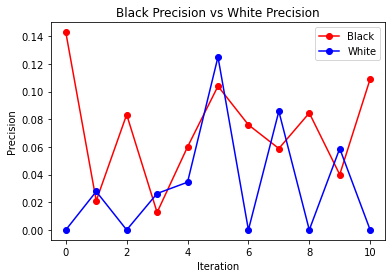

In [169]:
plot_evals(black_pres, white_pres, 'precision')

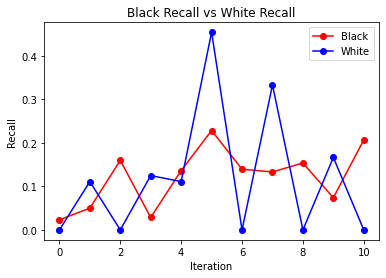

In [170]:
plot_evals(black_rec, white_rec, 'recall')

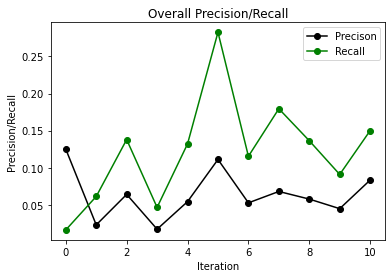

In [171]:
plot_evals(overall_pres, overall_rec, 'all')

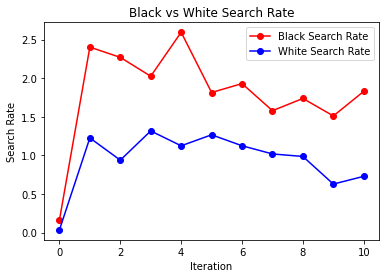

In [173]:
plot_evals(black_rates, white_rates, 'search')

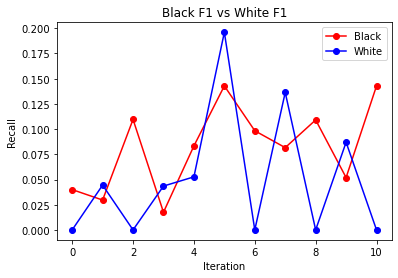

In [189]:
plot_evals(black_f1, white_f1, 'f1')

In [35]:
stops['date'] = pd.to_datetime(stops['date'])
stops['day_of_week'] = stops['date'].dt.day_name()

In [36]:
stops = stops.reset_index().drop(['index','time','year','date','citation_issued',
                                  'warning_issued','arrest_made','frisk_performed'], axis=1)

In [37]:
stops_model = stops[['subject_age','subject_race','subject_sex','type','reason_for_stop','day_night','day_of_week','search_conducted']]


In [38]:
stops_model['search_conducted'] = stops_model['search_conducted']*1

/tmp/ipykernel_131/1190972657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stops_model['search_conducted'] = stops_model['search_conducted']*1


In [40]:
cat_cols = ['subject_race','subject_sex','type','reason_for_stop', 'day_night','day_of_week']

encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(stops_model[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_ready = stops_model.drop(cat_cols ,axis=1)
df_ready = pd.concat([df_encoded, df_ready], axis=1)

In [41]:
df_ready

,subject_race_asian/pacific islander,subject_race_black,subject_race_hispanic,subject_race_white,subject_sex_female,subject_sex_male,type_vehicular,reason_for_stop_Checkpoint,reason_for_stop_Driving While Impaired,reason_for_stop_Investigation,...,day_night_night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,subject_age,search_conducted
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,40.0,0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,45.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139807,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.0,1
139808,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,36.0,1
139809,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.0,1
139810,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,1


In [42]:
reg_rf = LinearDiscriminantAnalysis()

In [43]:
test_1 = df_ready.drop(['search_conducted'],axis=1)
test_1_y = df_ready['search_conducted']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(test_1, test_1_y, test_size=0.15)

In [45]:
test_model = reg_rf.fit(X_train, y_train)

In [46]:
y_pred = test_model.predict(X_test)

In [47]:
y_test = list(y_test)

In [48]:
fin_sum = 0
for i in range(len(y_pred)):
    if y_test[i]==y_pred[i]:
        fin_sum+=1
fin_sum/len(y_pred)

0.960232691207324